In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from coprover import *

CSVs_ROOT = Path(RSC_ROOT, "pvs_cmd_pred/results/t5_topN_acc")

In [2]:
results = {}
for csv_fpath in list(CSVs_ROOT.glob("*.csv")):
    expname = csv_fpath.stem.split("_")[-1]
    expname = expname.replace("only", "")
    if expname == "full":
        expname = "cmdhistory+sequent"
    results[expname] = pd.read_csv(csv_fpath)

In [3]:
results

{'cmdhist':    Unnamed: 0   N     Acc
 0           0   1  0.3420
 1           1   2  0.4430
 2           2   3  0.5215
 3           3   4  0.5620
 4           4   5  0.6090
 5           5   6  0.6435
 6           6   7  0.6670
 7           7   8  0.7015
 8           8   9  0.7230
 9           9  10  0.7340,
 'sequent':    Unnamed: 0   N     Acc
 0           0   1  0.2890
 1           1   2  0.4050
 2           2   3  0.4585
 3           3   4  0.5255
 4           4   5  0.5635
 5           5   6  0.5975
 6           6   7  0.6220
 7           7   8  0.6560
 8           8   9  0.6740
 9           9  10  0.6975,
 'cmdhistory+sequent':    Unnamed: 0   N     Acc
 0           0   1  0.4460
 1           1   2  0.5235
 2           2   3  0.5670
 3           3   4  0.5905
 4           4   5  0.6180
 5           5   6  0.6665
 6           6   7  0.7235
 7           7   8  0.7580
 8           8   9  0.7725
 9           9  10  0.7830,
 'baseline':    Unnamed: 0   N     Acc
 0           0   1  0.1

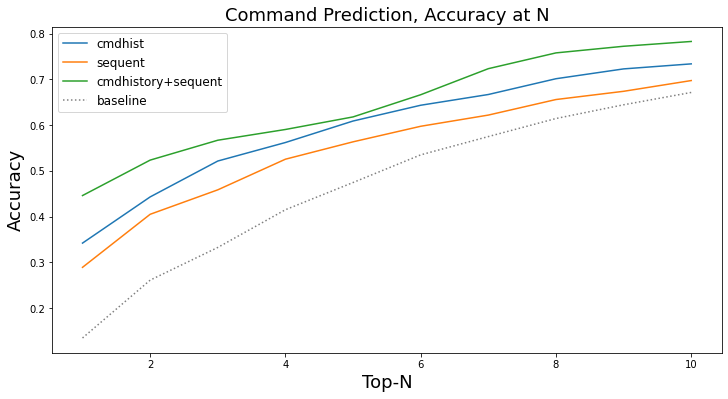

In [5]:
#plt.clf()
fig, ax = plt.subplots(1, figsize=(12,6))
for expname, result_df in results.items():
    if expname == "baseline":
        ax.plot(result_df["N"], result_df["Acc"], label=expname, linestyle="dotted", color="gray")
    else:
        ax.plot(result_df["N"], result_df["Acc"], label=expname)
ax.set_xlabel("Top-N", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
plt.title("Command Prediction, Accuracy at N", fontsize=18)
plt.legend(fontsize=12)
plt.savefig("cmdpred_topN.pdf")
plt.show()
